In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
d1 = pd.read_csv("Country-data.csv")

In [3]:
d1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
d1.shape

(167, 10)

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
d1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data=d1.drop('country', axis=1)

In [8]:
data.shape

(167, 9)

In [9]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
round(data.isnull().sum(axis=0)*100/data.shape[0],2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [11]:
scaler =StandardScaler().fit_transform(data)

# K-means

In [23]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
kmeans.cluster_centers_
kmeans.labels_

array([2, 7, 7, 2, 0, 0, 2, 5, 5, 7, 4, 9, 2, 0, 7, 5, 7, 2, 2, 2, 7, 7,
       0, 1, 7, 2, 2, 2, 2, 5, 2, 2, 2, 0, 7, 7, 2, 2, 2, 7, 2, 0, 4, 9,
       5, 7, 7, 7, 7, 9, 2, 0, 7, 5, 5, 0, 2, 2, 5, 2, 4, 7, 2, 2, 2, 2,
       2, 0, 5, 2, 7, 0, 7, 5, 4, 4, 7, 5, 7, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 9, 0, 3, 7, 2, 2, 0, 7, 2, 9, 2, 0, 2, 2, 7, 7, 2, 2, 2, 7, 2,
       5, 4, 2, 2, 6, 9, 2, 0, 7, 7, 2, 0, 9, 8, 0, 0, 2, 2, 9, 2, 7, 0,
       2, 1, 0, 9, 2, 7, 9, 4, 7, 7, 2, 7, 5, 6, 2, 2, 7, 2, 2, 2, 7, 0,
       7, 2, 7, 1, 5, 5, 0, 2, 2, 0, 2, 2, 2])

Elbow graph -->to know the optimum number of clusters should used

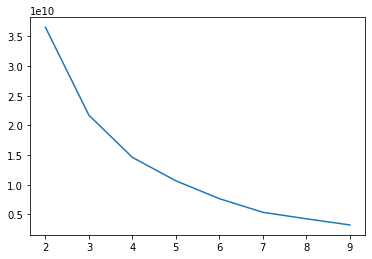

In [130]:
distortion=[]
k=range(2,10)
for i in k:
    kmeans=KMeans(n_clusters=i,max_iter=30).fit(data)
    distortion.append(kmeans.inertia_)
plt.plot(range(2,10),distortion)
plt.show()

In [131]:
data["assignments"] =kmeans.labels_
data_clustered = data.loc[(data.assignments >= 0)]

In [132]:
silhouette_score(data, data["assignments"])

0.5523908889858611

# After PCA

In [133]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)

In [134]:
silhouette_score(principalComponents,data["assignments"])

0.5524328781650977

# Hierarchical Clustering

In [135]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster.fit(data)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
data["assignments"] =cluster.labels_
data_clustered = data.loc[(data.assignments >= 0)] 
print(silhouette_score(data, data["assignments"]))

0.7100308689692489


# After PCA

In [137]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)

In [138]:
silhouette_score(principalComponents,data["assignments"])

0.7100324791593923

# DBSCAN

In [139]:
clustering = DBSCAN(eps=3, min_samples=11).fit(data)

In [140]:
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

Here the data was dense,so DBSCAN cannot clustered it ,they all in one cluster

In [146]:
"""data["assignments"] =clustering.labels_
data_clustered = data.loc[(data.assignments >= 0)] 
silhouette_score(data,data["assignments"])"""

'data["assignments"] =clustering.labels_\ndata_clustered = data.loc[(data.assignments >= 0)] \nsilhouette_score(data,data["assignments"])'

# GMM

In [147]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)
labels = gm.predict(data)

In [148]:
data["assignments"] =labels
data_clustered = data.loc[(data.assignments >= 0)]
silhouette_score(data, data["assignments"])

0.519170081272605

# After PCA

In [149]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)

In [150]:
silhouette_score(principalComponents,data["assignments"])

0.5191764497232544